In [2]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData

import scipy


In [3]:
FEATURE_DIMS = ["Color", "Shape", "Pattern"]
FEAT_1 = "SQUARE"
FEAT_2 = "TRIANGLE"
PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 50
SMOOTH = 1
EVENT = "FeedbackOnset"
OUTPUT_DIR = "/data/patrick_res/hyak/pseudo"
# path to a dataframe of sessions to analyze
SESSIONS_PATH = "/data/patrick_res/sessions/valid_sessions_rpe.pickle"

### Look at it for residual firing rates

Text(0, 0.5, 'Decoder Accuracy')

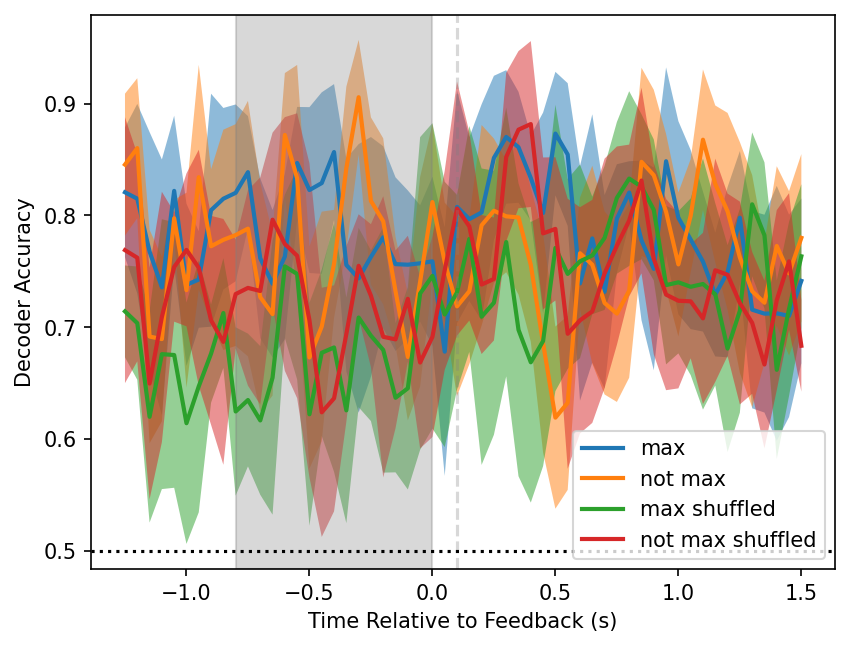

In [3]:
fig, ax = plt.subplots(dpi=150)
max = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_max_val_residual_fr_unshuffled_test_accs.npy"))
not_max = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_not_max_val_residual_fr_unshuffled_test_accs.npy"))
max_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_max_val_residual_fr_shuffled_test_accs.npy"))
not_max_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_not_max_val_residual_fr_shuffled_test_accs.npy"))

visualization_utils.visualize_accuracy_across_time_bins(
    max,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="max",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    not_max,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="not max",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    max_shuffled,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="max shuffled",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    not_max_shuffled,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="not max shuffled",
    right_align=True, 
)
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.5, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

### on normal firing rates

Text(0, 0.5, 'Decoder Accuracy')

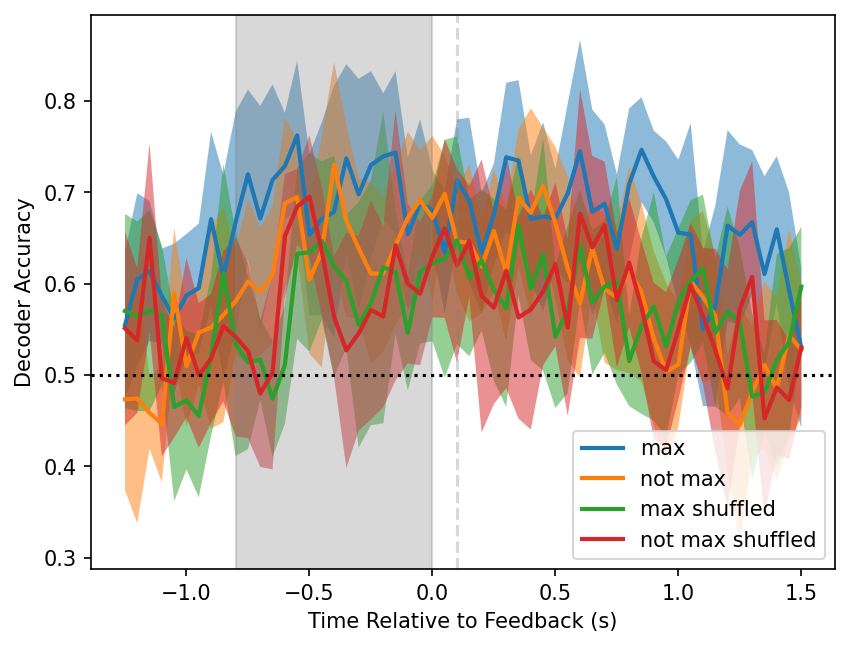

In [4]:
fig, ax = plt.subplots(dpi=150)
max = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_max_val_base_fr_unshuffled_test_accs.npy"))
not_max = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_not_max_val_base_fr_unshuffled_test_accs.npy"))
max_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_max_val_base_fr_shuffled_test_accs.npy"))
not_max_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_not_max_val_base_fr_shuffled_test_accs.npy"))

visualization_utils.visualize_accuracy_across_time_bins(
    max,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="max",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    not_max,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="not max",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    max_shuffled,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="max shuffled",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    not_max_shuffled,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="not max shuffled",
    right_align=True, 
)
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.5, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

### Split by cor/inc, residual firing rates

Text(0, 0.5, 'Decoder Accuracy')

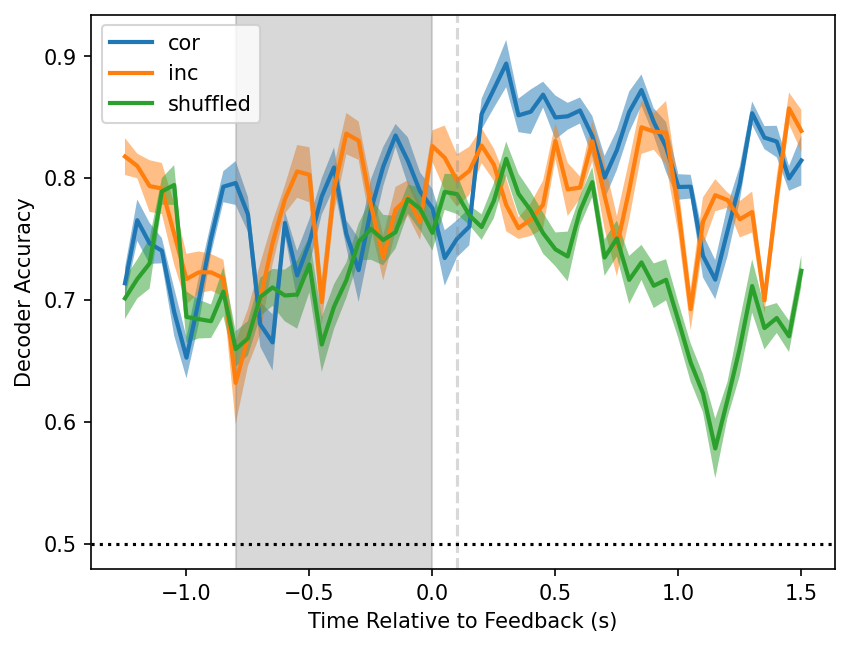

In [5]:
fig, ax = plt.subplots(dpi=150)
cor = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_Response_Correct_residual_fr_unshuffled_test_accs.npy"))
inc = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_Response_Incorrect_residual_fr_unshuffled_test_accs.npy"))
cor_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_Response_Correct_residual_fr_shuffled_test_accs.npy"))
inc_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_Response_Incorrect_residual_fr_shuffled_test_accs.npy"))
shuffled = np.hstack((cor_shuffled, inc_shuffled))

visualization_utils.visualize_accuracy_across_time_bins(
    cor,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="cor",
    right_align=True, 
    sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    inc,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="inc",
    right_align=True, 
    sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    shuffled,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="shuffled",
    right_align=True, 
    sem=True,
)
# visualization_utils.visualize_accuracy_across_time_bins(
#     inc_shuffled,
#     PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
#     ax,
#     label="inc shuffled",
#     right_align=True, 
# )
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.5, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

In [9]:
cor_shuffled.shape

(56, 8)

### Now with baseline frs

Text(0, 0.5, 'Decoder Accuracy')

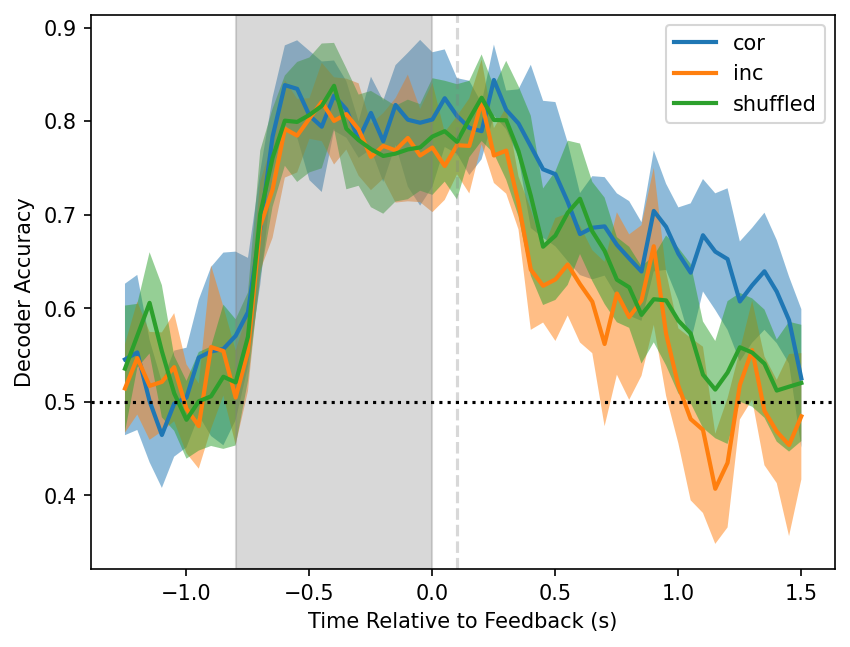

In [6]:
fig, ax = plt.subplots(dpi=150)
cor = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_Response_Correct_base_fr_unshuffled_test_accs.npy"))
inc = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_Response_Incorrect_base_fr_unshuffled_test_accs.npy"))
cor_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_Response_Correct_base_fr_shuffled_test_accs.npy"))
inc_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_Response_Incorrect_base_fr_shuffled_test_accs.npy"))
shuffled = np.hstack((cor_shuffled, inc_shuffled))

visualization_utils.visualize_accuracy_across_time_bins(
    cor,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="cor",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    inc,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="inc",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    shuffled,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="shuffled",
    right_align=True, 
)
# visualization_utils.visualize_accuracy_across_time_bins(
#     inc_shuffled,
#     PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
#     ax,
#     label="inc shuffled",
#     right_align=True, 
# )
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.5, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

### On all 4 features, residuals

Text(0, 0.5, 'Decoder Accuracy')

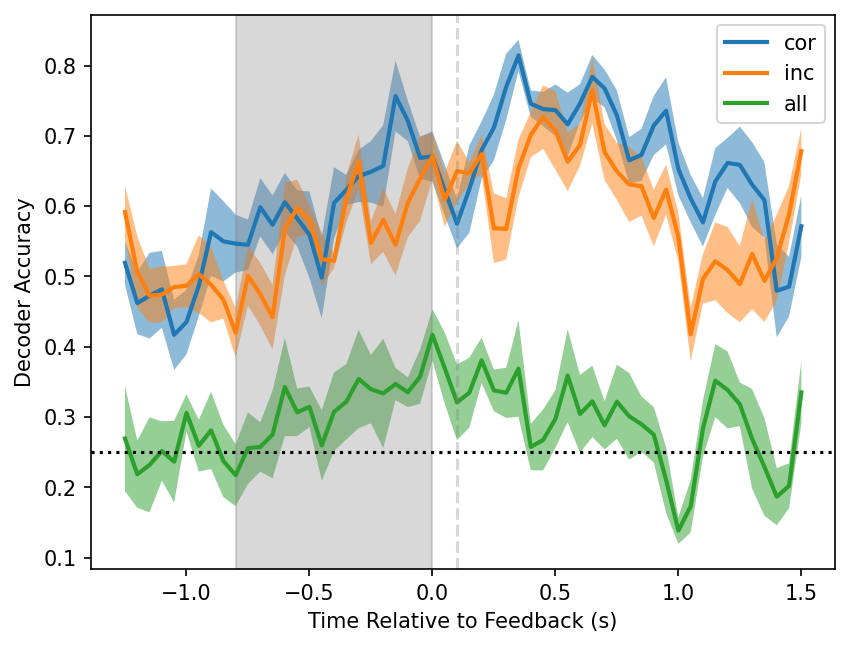

In [3]:
fig, ax = plt.subplots(dpi=150)
cor = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Correct_residual_fr_unshuffled_test_accs.npy"))
inc = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Incorrect_residual_fr_unshuffled_test_accs.npy"))
# cor_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Correct_residual_fr_shuffled_test_accs.npy"))
# inc_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Incorrect_residual_fr_shuffled_test_accs.npy"))
# shuffled = np.hstack((cor_shuffled, inc_shuffled))
all = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_all_residual_fr_unshuffled_test_accs.npy"))

visualization_utils.visualize_accuracy_across_time_bins(
    cor,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="cor",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    inc,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="inc",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    all,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="all",
    right_align=True, 
    # sem=True,
)
# visualization_utils.visualize_accuracy_across_time_bins(
#     shuffled,
#     PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
#     ax,
#     label="shuffled",
#     right_align=True, 
#     # sem=True,
# )
# visualization_utils.visualize_accuracy_across_time_bins(
#     inc_shuffled,
#     PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
#     ax,
#     label="inc shuffled",
#     right_align=True, 
# )
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

### All 4 features, base firing rates

Text(0, 0.5, 'Decoder Accuracy')

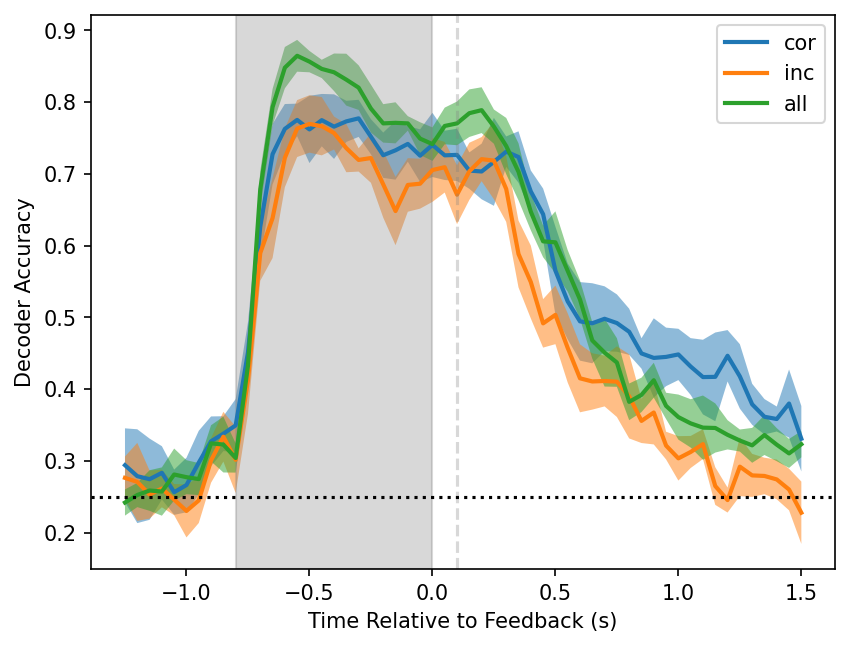

In [6]:
fig, ax = plt.subplots(dpi=150)
cor = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Correct_base_fr_unshuffled_test_accs.npy"))
inc = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Incorrect_base_fr_unshuffled_test_accs.npy"))
# cor_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Correct_base_fr_shuffled_test_accs.npy"))
# inc_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Incorrect_base_fr_shuffled_test_accs.npy"))
# shuffled = np.hstack((cor_shuffled, inc_shuffled))
all = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_all_base_fr_unshuffled_test_accs.npy"))

visualization_utils.visualize_accuracy_across_time_bins(
    cor,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="cor",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    inc,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="inc",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    all,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="all",
    right_align=True, 
    # sem=True,
)
# visualization_utils.visualize_accuracy_across_time_bins(
#     shuffled,
#     PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
#     ax,
#     label="shuffled",
#     right_align=True, 
#     # sem=True,
# )
# visualization_utils.visualize_accuracy_across_time_bins(
#     inc_shuffled,
#     PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
#     ax,
#     label="inc shuffled",
#     right_align=True, 
# )
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

### Cross decoding cor/inc

Text(0, 0.5, 'Decoder Accuracy')

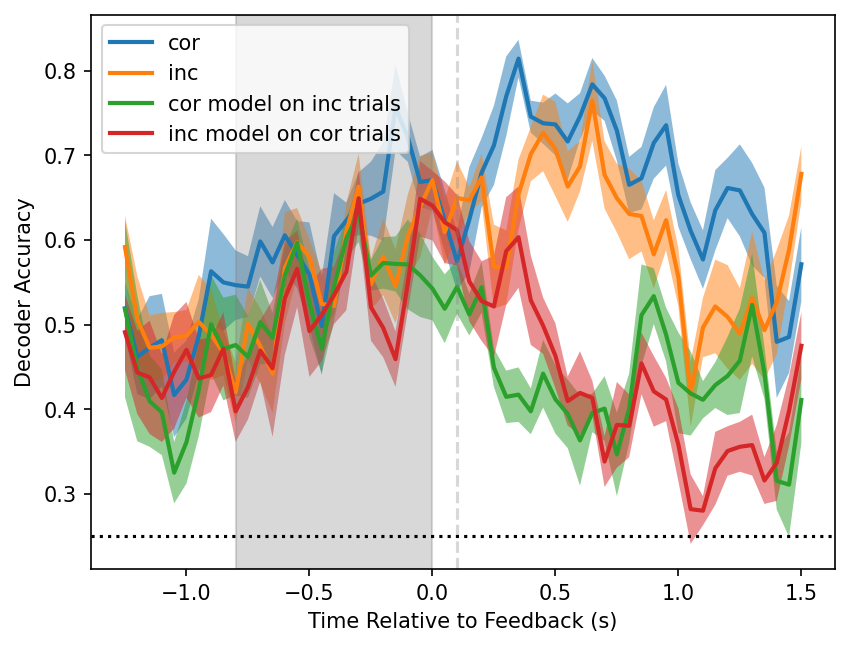

In [5]:
fig, ax = plt.subplots(dpi=150)
cor = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Correct_residual_fr_unshuffled_test_accs.npy"))
inc = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Incorrect_residual_fr_unshuffled_test_accs.npy"))
# cor_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Correct_residual_fr_shuffled_test_accs.npy"))
# inc_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Incorrect_residual_fr_shuffled_test_accs.npy"))
# shuffled = np.hstack((cor_shuffled, inc_shuffled))
cor_model_on_inc = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Correct_residual_fr_cross_accs.npy"))
inc_model_on_cor = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Incorrect_residual_fr_cross_accs.npy"))

# cor = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Correct_residual_feature_fb_fr_unshuffled_test_accs.npy"))
# inc = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Incorrect_residual_feature_fb_fr_unshuffled_test_accs.npy"))
# cor_model_on_inc = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Correct_residual_feature_fb_fr_cross_accs.npy"))
# inc_model_on_cor = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Incorrect_residual_feature_fb_fr_cross_accs.npy"))

# cor = np.load(os.path.join(OUTPUT_DIR, f"CYAN_vs_GREEN_vs_MAGENTA_vs_YELLOW_Response_Correct_residual_feature_fb_fr_unshuffled_test_accs.npy"))
# inc = np.load(os.path.join(OUTPUT_DIR, f"CYAN_vs_GREEN_vs_MAGENTA_vs_YELLOW_Response_Incorrect_residual_feature_fb_fr_unshuffled_test_accs.npy"))
# cor_model_on_inc = np.load(os.path.join(OUTPUT_DIR, f"CYAN_vs_GREEN_vs_MAGENTA_vs_YELLOW_Response_Correct_residual_feature_fb_fr_cross_accs.npy"))
# inc_model_on_cor = np.load(os.path.join(OUTPUT_DIR, f"CYAN_vs_GREEN_vs_MAGENTA_vs_YELLOW_Response_Incorrect_residual_feature_fb_fr_cross_accs.npy"))

# cor = np.load(os.path.join(OUTPUT_DIR, f"ESCHER_vs_POLKADOT_vs_RIPPLE_vs_SWIRL_Response_Correct_residual_feature_fb_fr_unshuffled_test_accs.npy"))
# inc = np.load(os.path.join(OUTPUT_DIR, f"ESCHER_vs_POLKADOT_vs_RIPPLE_vs_SWIRL_Response_Incorrect_residual_feature_fb_fr_unshuffled_test_accs.npy"))
# cor_model_on_inc = np.load(os.path.join(OUTPUT_DIR, f"ESCHER_vs_POLKADOT_vs_RIPPLE_vs_SWIRL_Response_Correct_residual_feature_fb_fr_cross_accs.npy"))
# inc_model_on_cor = np.load(os.path.join(OUTPUT_DIR, f"ESCHER_vs_POLKADOT_vs_RIPPLE_vs_SWIRL_Response_Incorrect_residual_feature_fb_fr_cross_accs.npy"))

visualization_utils.visualize_accuracy_across_time_bins(
    cor,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="cor",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    inc,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="inc",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    cor_model_on_inc,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="cor model on inc trials",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    inc_model_on_cor,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="inc model on cor trials",
    right_align=True, 
    # sem=True,
)
# visualization_utils.visualize_accuracy_across_time_bins(
#     inc_shuffled,
#     PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
#     ax,
#     label="inc shuffled",
#     right_align=True, 
# )
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

### Look at cross decoding with base frs

Text(0, 0.5, 'Decoder Accuracy')

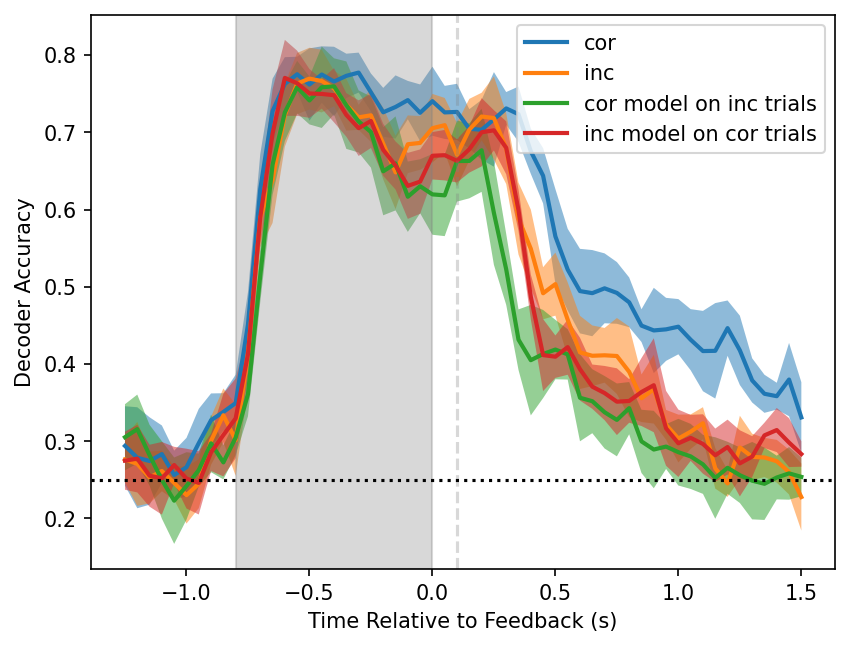

In [8]:
fig, ax = plt.subplots(dpi=150)
cor = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Correct_base_fr_unshuffled_test_accs.npy"))
inc = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Incorrect_base_fr_unshuffled_test_accs.npy"))
# cor_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Correct_residual_fr_shuffled_test_accs.npy"))
# inc_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Incorrect_residual_fr_shuffled_test_accs.npy"))
# shuffled = np.hstack((cor_shuffled, inc_shuffled))
cor_model_on_inc = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Correct_base_fr_cross_accs.npy"))
inc_model_on_cor = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Incorrect_base_fr_cross_accs.npy"))

visualization_utils.visualize_accuracy_across_time_bins(
    cor,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="cor",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    inc,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="inc",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    cor_model_on_inc,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="cor model on inc trials",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    inc_model_on_cor,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="inc model on cor trials",
    right_align=True, 
    # sem=True,
)
# visualization_utils.visualize_accuracy_across_time_bins(
#     inc_shuffled,
#     PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
#     ax,
#     label="inc shuffled",
#     right_align=True, 
# )
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

### Pattern

Text(0, 0.5, 'Decoder Accuracy')

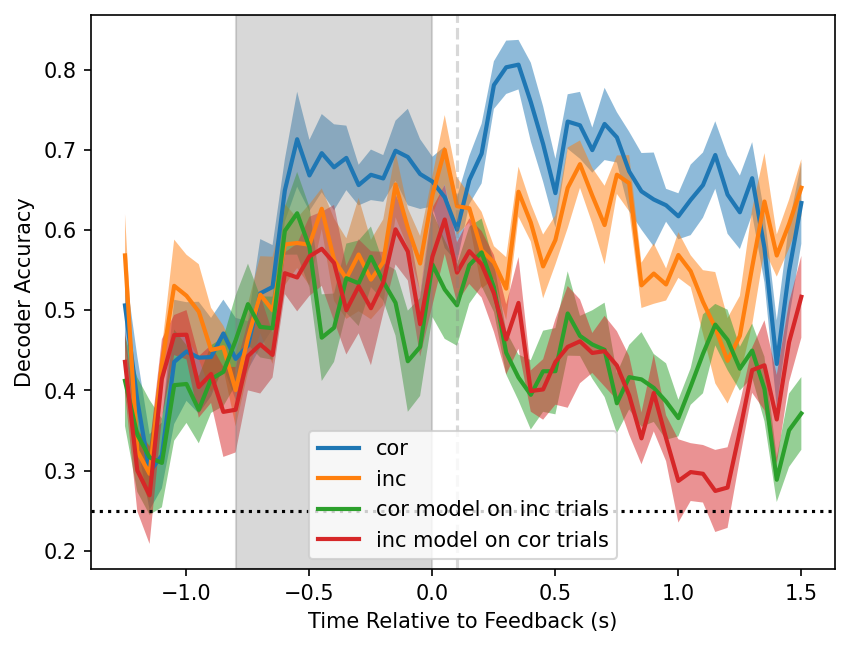

In [4]:
fig, ax = plt.subplots(dpi=150)
cor = np.load(os.path.join(OUTPUT_DIR, f"ESCHER_vs_POLKADOT_vs_RIPPLE_vs_SWIRL_Response_Correct_residual_fr_unshuffled_test_accs.npy"))
inc = np.load(os.path.join(OUTPUT_DIR, f"ESCHER_vs_POLKADOT_vs_RIPPLE_vs_SWIRL_Response_Incorrect_residual_fr_unshuffled_test_accs.npy"))
# cor_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Correct_residual_fr_shuffled_test_accs.npy"))
# inc_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Incorrect_residual_fr_shuffled_test_accs.npy"))
# shuffled = np.hstack((cor_shuffled, inc_shuffled))
cor_model_on_inc = np.load(os.path.join(OUTPUT_DIR, f"ESCHER_vs_POLKADOT_vs_RIPPLE_vs_SWIRL_Response_Correct_residual_fr_cross_accs.npy"))
inc_model_on_cor = np.load(os.path.join(OUTPUT_DIR, f"ESCHER_vs_POLKADOT_vs_RIPPLE_vs_SWIRL_Response_Incorrect_residual_fr_cross_accs.npy"))

visualization_utils.visualize_accuracy_across_time_bins(
    cor,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="cor",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    inc,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="inc",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    cor_model_on_inc,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="cor model on inc trials",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    inc_model_on_cor,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="inc model on cor trials",
    right_align=True, 
    # sem=True,
)
# visualization_utils.visualize_accuracy_across_time_bins(
#     inc_shuffled,
#     PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
#     ax,
#     label="inc shuffled",
#     right_align=True, 
# )
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

### Color

Text(0, 0.5, 'Decoder Accuracy')

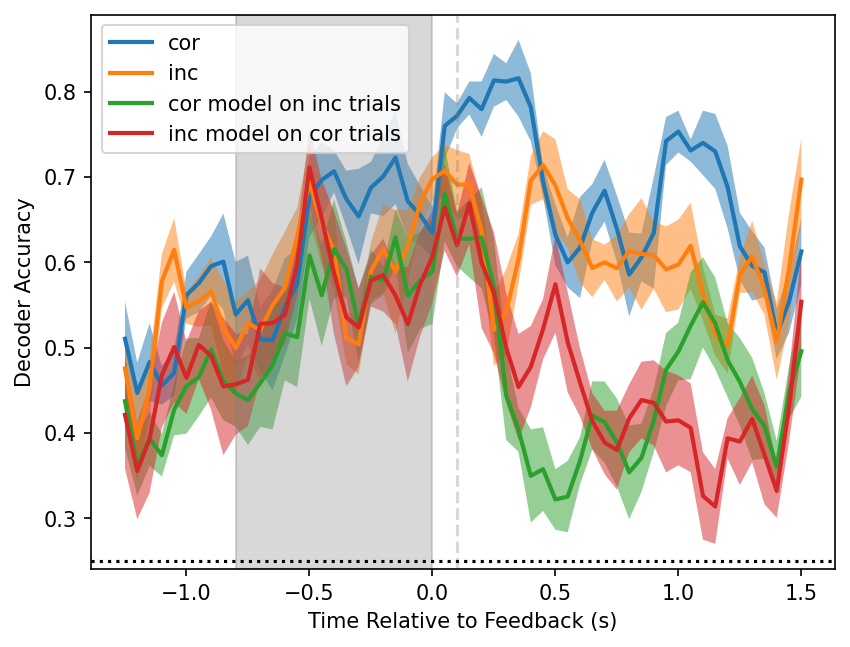

In [5]:
fig, ax = plt.subplots(dpi=150)
cor = np.load(os.path.join(OUTPUT_DIR, f"CYAN_vs_GREEN_vs_MAGENTA_vs_YELLOW_Response_Correct_residual_fr_unshuffled_test_accs.npy"))
inc = np.load(os.path.join(OUTPUT_DIR, f"CYAN_vs_GREEN_vs_MAGENTA_vs_YELLOW_Response_Incorrect_residual_fr_unshuffled_test_accs.npy"))
# cor_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Correct_residual_fr_shuffled_test_accs.npy"))
# inc_shuffled = np.load(os.path.join(OUTPUT_DIR, f"SQUARE_vs_TRIANGLE_vs_CIRCLE_vs_STAR_Response_Incorrect_residual_fr_shuffled_test_accs.npy"))
# shuffled = np.hstack((cor_shuffled, inc_shuffled))
cor_model_on_inc = np.load(os.path.join(OUTPUT_DIR, f"CYAN_vs_GREEN_vs_MAGENTA_vs_YELLOW_Response_Correct_residual_fr_cross_accs.npy"))
inc_model_on_cor = np.load(os.path.join(OUTPUT_DIR, f"CYAN_vs_GREEN_vs_MAGENTA_vs_YELLOW_Response_Incorrect_residual_fr_cross_accs.npy"))

visualization_utils.visualize_accuracy_across_time_bins(
    cor,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="cor",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    inc,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="inc",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    cor_model_on_inc,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="cor model on inc trials",
    right_align=True, 
    # sem=True,
)
visualization_utils.visualize_accuracy_across_time_bins(
    inc_model_on_cor,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label="inc model on cor trials",
    right_align=True, 
    # sem=True,
)
# visualization_utils.visualize_accuracy_across_time_bins(
#     inc_shuffled,
#     PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
#     ax,
#     label="inc shuffled",
#     right_align=True, 
# )
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")